# Fierce Research - Rate of Inflation in the United States 

In this blog, I looked at the impact of inflation on different asset classes and the S&P 500 Sectors.

## Rate of Inflation and Cross-Asset Classes

US Equities, Real Bond Yield, Inflation, Real Estate, Commodities since 1914*

Timeframe: 
- Dow Jones Index, Real Bond Yield = 1900
- US CPI YoY = 1914
- Real Estate - Existing Home Sales Avg Price = 1968
- S&P GSCI Commodities = 1969

In [9]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

import DatastreamDSWS as PyDSWS
ds = PyDSWS.Datastream(username='ZTHN039', password='KODAK867')

df = ds.get_data(tickers='PCH#(USSHRPRCF,1Y), USGB10YR, USEBMCPI%, PCH#(USHSAVGEA,1Y), PCH#(GSCITOT,1Y)',
                  start="-120Y",end="-1", freq="M")

df.columns= ['1Y% Chg Dow Jones','US 10Y Real', 'CPI YoY', '1Y% Chg US Home Price Index','1Y% Chg GSCI Commodity Total Return']
df = df.round(2)
df

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
Dates,,,,,
1901-12-31,-8.70,2.86,NaN,NaN,NaN
1902-01-31,-2.78,2.88,NaN,NaN,NaN
1902-02-28,-3.27,2.87,NaN,NaN,NaN
1902-03-31,-3.23,2.87,NaN,NaN,NaN
1902-04-30,-11.60,2.86,NaN,NaN,NaN
...,...,...,...,...,...
2021-07-30,32.75,-4.05,5.4,12.0,54.02
2021-08-31,24.38,-3.97,5.3,10.1,45.65
2021-09-30,21.82,-4.02,5.4,8.2,54.94


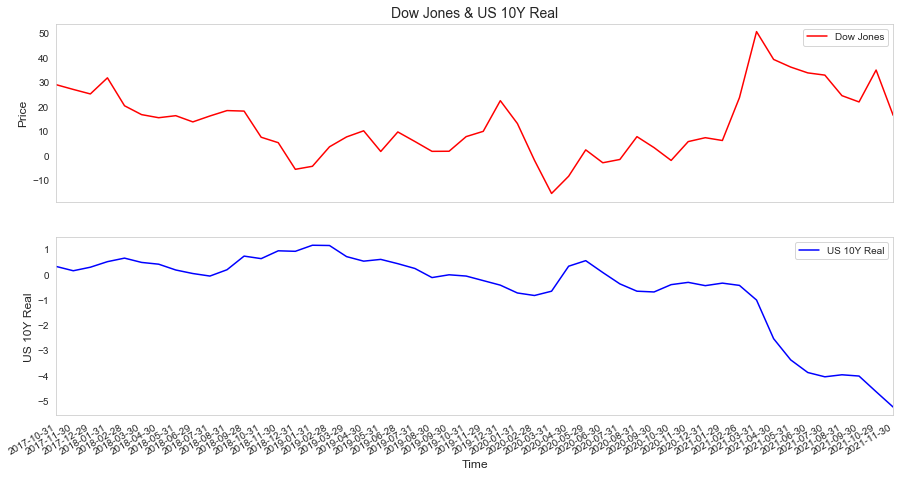

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,8))
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0),rowspan=1)  
plt.plot(df.index[-50:],df['1Y% Chg Dow Jones'][-50:],label='Dow Jones', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df.index[-50],df.index[-1])
plt.title('Dow Jones & US 10Y Real',size=14)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((2,1), (1,0),rowspan=1)
plt.plot(df.index[-50:],df['US 10Y Real'][-50:],label='US 10Y Real', color='Blue')
plt.xlabel('Time', size=12)
plt.ylabel('US 10Y Real',size=12)
plt.xlim(df.index[-50],df.index[-1])
plt.legend()
plt.grid()
fig.autofmt_xdate()

In [11]:
df.describe().round()

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
count,1432.0,1436.0,1294.0,634.0,611.0
mean,7.0,2.0,3.0,6.0,9.0
std,21.0,5.0,5.0,5.0,26.0
min,-71.0,-18.0,-16.0,-17.0,-65.0
25%,-5.0,0.0,1.0,3.0,-5.0
50%,7.0,2.0,3.0,5.0,8.0
75%,19.0,4.0,4.0,9.0,25.0
max,129.0,21.0,24.0,21.0,126.0


In [12]:
df.corr().round(2)

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
1Y% Chg Dow Jones,1.00,-0.02,0.00,0.09,0.08
US 10Y Real,-0.02,1.00,-0.85,-0.24,-0.25
CPI YoY,0.00,-0.85,1.00,0.45,0.44
1Y% Chg US Home Price Index,0.09,-0.24,0.45,1.00,0.27
1Y% Chg GSCI Commodity Total Return,0.08,-0.25,0.44,0.27,1.00


In [13]:
cpi_group = []
for x in df['CPI YoY']:
    if x < 1:
        cpi_group.append('< 1%')
    elif x < 2:
        cpi_group.append('> 1% < 2%')
    elif x < 3:
        cpi_group.append('> 2% < 3%')
    elif x < 4:
        cpi_group.append('> 3% < 4%')
    else:
        cpi_group.append('> 4%')
df['cpi group'] = cpi_group

df_ = df.groupby(['cpi group']).mean().round(2)

df_.style.highlight_max(color = 'lightgreen', axis = 0)

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
cpi group,,,,,
< 1%,5.150000,5.560000,-2.420000,-2.090000,-42.550000
> 1% < 2%,9.530000,2.100000,1.430000,6.050000,-10.620000
> 2% < 3%,14.300000,1.900000,2.450000,4.410000,8.050000
> 3% < 4%,8.550000,2.190000,3.410000,4.360000,19.310000
> 4%,4.120000,-0.770000,8.600000,7.590000,22.620000


### Summary: 
- When CPI is below 1%, a longer duration in Fixed Income is desired
- The sweet spot for US Equities Large-Cap is when the CPI is between 2 and 3%
- As the CPI creeps above 4%, it appears to be rewarding to overweight Real Estate and Commodities

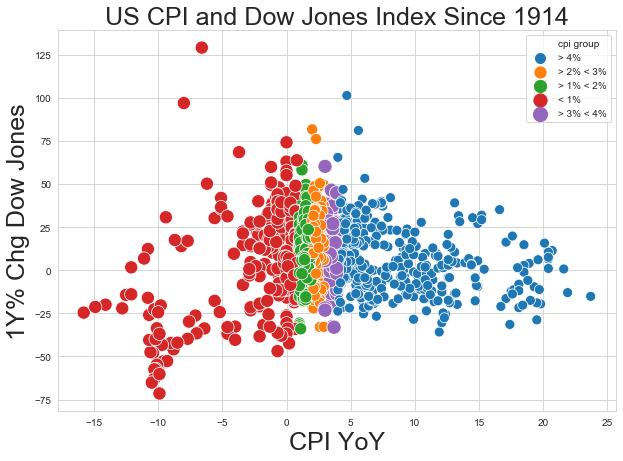

In [14]:
fig = plt.figure(figsize=(10,7))
plt.title('US CPI and Dow Jones Index Since 1914',size=25)
plt.xlabel(' ',size=25)
plt.ylabel(' ',size=25)
sns.scatterplot(x=df['CPI YoY'],y=df['1Y% Chg Dow Jones'],hue=df['cpi group'],size=df['cpi group'],sizes=(200,100));

## Rate of Inflation and the S&P 500 Sectors since 1989

In [15]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

import DatastreamDSWS as PyDSWS
ds = PyDSWS.Datastream(username='ZTHN039', password='KODAK867')

df1 = ds.get_data(tickers='USEBMCPI%, PCH#(SP5EENE,1Y), PCH#(SP5EIND,1Y),PCH#(SP5EINT,1Y),PCH#(SP5EFIN,1Y), PCH#(SP5EMAT,1Y), PCH#(SP5EUTL,1Y), PCH#(SP5ETEL,1Y), PCH#(SP5ECOD,1Y), PCH#(SP5ECST,1Y),PCH#(SP5EHCR,1Y),PCH#(SP5ER11,1Y)',
                  start="-367",end="-1", freq="M")

df1.columns= ['cpi','energy','industrials','info tech','financials','materials','utilities','comm services','cons discr','cons staples','health care','real estate']
df1 = df1.round(2)
df1

,cpi,energy,industrials,info tech,financials,materials,utilities,comm services,cons discr,cons staples,health care,real estate
Dates,,,,,,,,,,,,
1991-05-15,5.0,5.13,0.07,-2.01,2.24,3.52,0.44,-13.67,5.91,27.56,37.77,NaN
1991-06-15,4.7,2.65,-0.12,-11.17,-0.74,7.90,0.04,-15.25,1.80,19.90,25.07,NaN
1991-07-15,4.4,-1.10,-2.79,-10.86,3.26,8.34,2.40,-3.79,3.38,15.00,18.96,NaN
1991-08-15,3.8,-4.80,9.48,6.77,24.14,15.06,8.51,1.05,24.27,29.61,34.59,NaN
1991-09-15,3.4,-3.12,16.42,12.54,32.84,20.29,13.55,8.97,32.05,32.94,39.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15,5.4,47.34,50.35,43.43,55.80,41.90,11.29,43.20,32.47,17.02,27.32,33.67
2021-08-15,5.3,30.54,36.11,35.80,53.81,37.88,12.76,40.75,21.73,14.15,24.98,31.62
2021-09-15,5.4,51.04,31.83,38.48,53.98,28.78,16.08,43.85,22.31,12.69,26.62,33.38


In [16]:
df1.describe().round()

,cpi,energy,industrials,info tech,financials,materials,utilities,comm services,cons discr,cons staples,health care,real estate
count,366.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,230.0
mean,2.0,7.0,10.0,16.0,10.0,8.0,6.0,6.0,12.0,9.0,11.0,8.0
std,1.0,21.0,18.0,28.0,23.0,18.0,16.0,21.0,18.0,13.0,18.0,23.0
min,-2.0,-50.0,-54.0,-62.0,-68.0,-52.0,-49.0,-54.0,-43.0,-36.0,-30.0,-62.0
25%,2.0,-5.0,1.0,2.0,-3.0,-0.0,0.0,-5.0,3.0,2.0,0.0,-1.0
50%,2.0,7.0,11.0,15.0,10.0,10.0,8.0,5.0,14.0,9.0,10.0,9.0
75%,3.0,20.0,20.0,32.0,24.0,17.0,15.0,19.0,22.0,16.0,23.0,21.0
max,6.0,85.0,76.0,94.0,91.0,74.0,50.0,65.0,77.0,44.0,63.0,92.0


In [17]:
df1.corr().round(2).sort_values('cpi',ascending=False).iloc[:,:1]

,cpi
cpi,1.00
energy,0.60
materials,0.34
industrials,0.31
utilities,0.27
real estate,0.27
financials,0.22
cons staples,0.15
comm services,0.09
info tech,0.07


In [18]:
cpi_group = []
for x in df1['cpi']:
    if x < 1:
        cpi_group.append('< 1%')
    elif x < 2:
        cpi_group.append('> 1% < 2%')
    elif x < 3:
        cpi_group.append('> 2% < 3%')
    elif x < 4:
        cpi_group.append('> 3% < 4%')
    else:
        cpi_group.append('> 4%')
df1['cpi group'] = cpi_group

df1_ = df1.groupby(['cpi group']).mean().round(2)

df1_.style.highlight_max(color = 'lightgreen', axis = 0)

,cpi,energy,industrials,info tech,financials,materials,utilities,comm services,cons discr,cons staples,health care,real estate
cpi group,,,,,,,,,,,,
< 1%,-0.120000,-24.720000,-13.760000,0.150000,-16.490000,-15.070000,-7.370000,-9.080000,-1.960000,-1.140000,2.380000,-13.950000
> 1% < 2%,1.500000,-2.500000,8.480000,15.800000,9.640000,6.120000,4.990000,8.770000,17.860000,10.090000,13.700000,11.000000
> 2% < 3%,2.460000,11.700000,15.680000,24.960000,18.110000,14.610000,5.370000,9.650000,15.880000,9.950000,13.740000,14.010000
> 3% < 4%,3.310000,14.190000,9.490000,9.110000,9.420000,5.200000,10.550000,0.830000,6.590000,8.070000,7.550000,10.630000
> 4%,4.710000,29.410000,14.020000,12.200000,7.480000,19.150000,8.000000,8.020000,3.810000,10.200000,9.550000,6.480000


### Summary: 
- At the current CPI level, it is best to overweight info tech, financials, industrials, real estate, and materials
- As the CPI creeps up above 4%, it is recommended to overweight energy, consumer staples, health care, and materials 

Guillaume Girard, CMT

Fierce Research